<a href="https://colab.research.google.com/github/dsakharuk/Deliverables/blob/master/Converting_stroke_data_to_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import IPython.display
import PIL.Image
import random
from skimage.transform import resize
import math
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from PIL import ImageOps
import itertools
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
%load_ext tensorboard
import datetime, os
#!pip install tensorflow==2.0.0

#print(tf.__version__)
# I read in my training data set here
path = "/content/drive/My Drive/Data/train-data.csv"
df = pd.read_csv(path, sep= ";", header = 0,quotechar="'")
path2 = "/content/drive/My Drive/Data/test-data.csv"
df_test = pd.read_csv(path2, sep= ";", header = 0,quotechar="'")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
print(tf.__version__)

2.0.0


In [0]:
#This will create a new array with the shrunk down image sizes 
#For training
raw_strokes = df['data']
smaller_images = []
for image in raw_strokes:
  image_ar = []
  indiv_stroke = eval(image)
  for stroke_2 in indiv_stroke:
    for point in stroke_2:
      x = math.floor(point['x'] / 5)
      y = math.floor(point['y'] / 5)
      image_ar.append((x,y))
  smaller_images.append(image_ar)
smaller_images.pop()
new_images = np.array(smaller_images)


In [0]:
#Trying to crop one image
original = PIL.Image.fromarray(draw_it(new_images[2]))
original = PIL.ImageOps.expand(original,border=2, fill=1)
IPython.display.display(original)
cropp = original.crop((5,0,200,200))
cropp = PIL.ImageOps.expand(cropp,border=2)
IPython.display.display(cropp)


NameError: ignored

In [0]:
#I am going to crop the images here
#print((new_images[20][0][0]))
#print(new_images[1][0])
cropped_images = []
#max_x = 0
#max_y = 0
#min_x = 10000
#min_y = 10000
#max_dif = 0
#max_dif_y =0
#counter = 0
for imm in new_images:
#imm = new_images[10000]
  max_x = 0
  max_y = 0
  min_x = 10000
  min_y = 10000
  original = PIL.Image.fromarray(draw_it(imm))
  for x in imm:
    max_x = max(max_x,x[0])
    max_y = max(max_y,x[1])
    min_x = min(min_x,x[0])
    min_y = min(min_y,x[1])
    #max_dif = max((max_x-min_x),max_dif)
    #max_dif_y = max((max_y-min_y),max_dif_y)
  #if max_dif == 795 and counter == 0:
     # print(imm)
     # print(max_x, min_x)
     # counter = 1
  left = min_x -10
  right = left + 100
  top = min_y -10
  bottom = top + 100
  #IPython.display.display(original)
  original = PIL.ImageOps.expand(original,border=25,fill=255)
  cropped = original.crop((left,top,right,bottom))
  #IPython.display.display(cropped)
  cropped_images.append(cropped)
  
#print(max_x,max_y)
#print(min_x,min_y)
#print(max_dif,max_dif_y)
#print(counter)

In [0]:
for x in enumerate(cropped_images):
  cropp = PIL.ImageOps.expand(x[1],border=2,fill=1)
  print(cropp.size)
  IPython.display.display(cropp)
  print(x[0])

#orig = PIL.Image.fromarray(draw_it(new_images[520]))
#orig = PIL.ImageOps.expand(orig,border=2)
#IPython.display.display(orig)
#print(orig.size)
#print(cropped_images[10500].shape)

In [0]:
#Visualizing first image
plt.figure()
plt.imshow(cropped_images[70000])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
print(cropped_images[861].getbbox())

(0, 0, 100, 100)


In [0]:
#I will remove all the completely black images from the data set and their key in the Y_train list
for a in enumerate(cropped_images):
  if a[1].getbbox() == None:
    del cropped_images[a[0]]
    del y_train_not_shuffled[a[0]]


In [0]:
#I will convert the list of PIL images into a np array 
#new_cropped = []
#for x in shuffled_images:
  #new_cropped.append(np.array(x))
#new_cropped = np.asarray(new_cropped)
print(new_cropped.shape)
print(type(new_cropped[3]))
print(len(y_train))
#new_cropped = np.expand_dims(new_cropped,axis=3)


(150942, 100, 100, 1)
<class 'numpy.ndarray'>
150942


In [0]:
print(len(cropped_images))
print(len(y_train_not_shuffled))

150942
150942


In [0]:
#Creating the y array of image classes

#Train Symbols
y_train_not_shuffled = df['symbol_id'].tolist()
print(len(y_train_not_shuffled))
y_train_not_shuffled.pop(151158)

#Test Symbols
y_test_not_shuffled = df_test['symbol_id'].tolist()



#print(y_train[12000])
#print(len(y_train))
#print(type(y_train))

151159


In [0]:
#This shuffles the training/testing images images so that it is possible to break down data into batches.
#shuffled_images, y_train = shuffle(cropped_images, y_train_not_shuffled)
shuffled_test, y_test = shuffle(cropped_test, y_test_not_shuffled)


In [0]:

#a = ['1','2','3']
#print(type(y_train))
#b = shuffle(a)
#print(b)
#y_train = shuffle(y_train_not_shuffled)
print(y_train[2500])
print(y_train_not_shuffled[2500])
#print(type(train_images))

889
59


In [0]:
#This is my conversion function. It takes the stroke data of each image and draws out the image by connecting the dots.

def draw_it(points):
    image = Image.new("L", (264,264), color=255)
    image_draw = ImageDraw.Draw(image)

    for i in range(len(points)-1 ):
      image_draw.line([points[i][0], 
                        points[i][1],
                        points[i+1][0], 
                        points[i+1][1]],
                      fill=0, width=2)
    return np.array(image) 

In [0]:
#shuffled_images = np.array(shuffled_images)
print(type(new_cropped[30]))
print(np.shape(new_cropped[30]))
print(new_cropped[60])

In [0]:
#This will create batches of testing images so my RAM doesnt crash
#print(len(batch_train))
batch_train = np.split(shuffled_images,4)
#print(len(batch_train[0]))
batch_labels = np.split(np.array(y_train),4)
#print(len(batch_labels))

In [0]:
#This will create array of images for Training
def convert(batch):
  temp = []
  for x in batch:
    temp.append(draw_it(x))
  return temp


In [0]:
#np.save('first_train_images',train_images)
#!cp small_image.csv "drive/My Drive/Data/"

In [0]:
#Train Images
#This will save the new small image array into a csv file and then save it to drive
#split_train_images = np.split(train_images,2)
#train_images_1 = split_train_images[0]
#train_images_2 = split_train_images[1]
np.save('converted_train_images',new_cropped)
#np.savetxt('small_image.csv',new_images,fmt='%s',delimiter=',')
!cp converted_train_images.npy "drive/My Drive/Data/"
#print(small_image.csv[3000])
#print(len(new_images))
#print(new_images[3000])
#print(type(new_images[3000]))

In [0]:
#This is saving the label datasets
np.savetxt('y_train.csv',y_train,fmt='%s',delimiter=',')
!cp y_train.csv "drive/My Drive/Data/"
#print(y_train.shape)

In [0]:
#This checks the shape of all the training data
print(new_cropped.shape)

(150932, 100, 100, 1)


In [0]:
#Test Images
#This will create a new array with the shrunk down image sizes for testing 
raw_strokes = df_test['data']
smallr_images = []
for image in raw_strokes:
  image_ar = []
  indiv_stroke = eval(image)
  for stroke_2 in indiv_stroke:
    for point in stroke_2:
      x = math.floor(point['x'] / 10)
      y = math.floor(point['y'] / 10)
      image_ar.append((x,y))
  smallr_images.append(image_ar)
test_images = np.array(smallr_images)


In [0]:
#This will crop all the test images
cropped_test = []

for imm in test_images:
#imm = new_images[10000]
  max_x = 0
  max_y = 0
  min_x = 10000
  min_y = 10000
  originall = PIL.Image.fromarray(draw_it(imm))
  for x in imm:
    max_x = max(max_x,x[0])
    max_y = max(max_y,x[1])
    min_x = min(min_x,x[0])
    min_y = min(min_y,x[1])

  left = min_x -10
  right = left + 100
  top = min_y -10
  bottom = top + 100
  #IPython.display.display(original)
  originall = PIL.ImageOps.expand(originall,border=25,fill=255)
  croppd = originall.crop((left,top,right,bottom))
  #IPython.display.display(cropped)
  cropped_test.append(croppd)
  
#print(max_x,max_y)
#print(min_x,min_y)
#print(max_dif,max_dif_y)
#print(counter)

In [0]:
#This will remove all black images in test dataset
for a in enumerate(cropped_test):
  if a[1].getbbox() == None:
    del cropped_test[a[0]]
    del y_test_not_shuffled[a[0]]

In [0]:
print(len(cropped_test))
print(len(y_test_not_shuffled))

17074
17074


In [0]:
#This will convert shuffled small test images into correct numpy array
#new_cropped_test = []
#for x in shuffled_test:
 # new_cropped_test.append(np.array(x))
#new_cropped_test = np.asarray(new_cropped_test)
print(new_cropped_test.shape)
print(type(new_cropped_test[3]))
print(len(y_test))
#new_cropped_test = np.expand_dims(new_cropped_test,axis=3)

(17074, 100, 100, 1)
<class 'numpy.ndarray'>
17074


In [0]:
#Test Images
#This will save the new small image array into a csv file and then save it to drive TESTING
np.save('converted_test_images',new_cropped_test)
#np.savetxt('test_images.csv',test_images,fmt='%s',delimiter=',')
!cp converted_test_images.npy "drive/My Drive/Data/"
#print(small_image.csv[3000])
#print(len(new_images))
#print(new_images[3000])
#print(type(new_images[3000]))

In [0]:
#This saves the test labels as csv
np.savetxt('y_test.csv',y_test,fmt='%s',delimiter=',')
!cp y_test.csv "drive/My Drive/Data/"

In [0]:
#draw_it(new_images[20000])
print(type(train_images[50]))
image = PIL.Image.fromarray(train_images[50])
imagee = PIL.ImageOps.expand(image,border=2)
IPython.display.display(imagee)
#IPython.display.display(PIL.Image.fromarray(imagee))

In [0]:
#This is a tester block that I made to print out 10 random images using my conversion method above

#raw_strokes = df['data']
#symbols = df['symbol_id']

for i in range(100):
  x = random.randrange(0,80000)
  im = draw_it(new_images[x])
  image = PIL.Image.fromarray(im)
  imagel = PIL.ImageOps.expand(image,border=2)
  IPython.display.display(imagel)


In [0]:
#________________________________________________________________________________________________________________________________________________________________________________
#____________________________________________________________________________________________________________________________________________________________________
#This will start my Pipeline
#I will build a simple sequential Keras model first
path = "/content/drive/My Drive/Data/y_train.csv"
dftrain = pd.read_csv(path, sep= ";", header = None,quotechar="'")
dftrain = np.asarray(dftrain)
#dftrain = dftrain -31
path2 = "/content/drive/My Drive/Data/y_test.csv"
dftest = pd.read_csv(path2, sep= ";", header = None,quotechar="'")
dftest = np.asarray(dftest)
#dftest = dftest - 31
path3 = "/content/drive/My Drive/Data/converted_train_images.npy"
train_images = np.load(path3)
path4 = "/content/drive/My Drive/Data/converted_test_images.npy"
test_images = np.load(path4)
path5 = "/content/drive/My Drive/Data/symbols.csv"
dfsymbols = pd.read_csv(path5, sep= ";", header = None,quotechar="'")
dflabels = dfsymbols.iloc[1:,1]
dflabels = np.asarray(dflabels)
dfsymbols = dfsymbols.iloc[1:,0]
dfsymbols = np.asarray(dfsymbols)

In [4]:
#Checking the shape of all my data
print(train_images.shape)
print(test_images.shape)

(150942, 100, 100, 1)
(17074, 100, 100, 1)


In [0]:
#Preprocessing images
train_images = train_images/255.0
test_images = test_images/255.0


In [0]:
#Creating dictionary
print(dfsymbols[0])
print(len(dfsymbols))
Dict = {}
for x,y in enumerate(dfsymbols):
  Dict.update({y:x})

In [0]:
#creating mapping dictionary
alphabet = {}
for c in range(369):
  alphabet.update({c:dflabels[c]})

In [0]:
#saving mapping dictionary
np.save("/content/drive/My Drive/Data/mapping_dictionary.npy",alphabet)

In [0]:
#Adjusting training labels
temp = []
for x in range(len(dftrain)):
  number = dftrain[x][0]
  #print(number)
  b = Dict[str(number)]
  #print(a)
  temp.append(b)

In [0]:
#Saving new training symbols
np.savetxt('y_train.csv',temp,fmt='%s',delimiter=',')
!cp y_train.csv "drive/My Drive/Data/"

In [0]:
#Doing the same thing for the test symbols
tempo = []
for x in range(len(dftest)):
  numberr = dftest[x][0]
  #print(number)
  c = Dict[str(numberr)]
  #print(a)
  tempo.append(c)

In [0]:
#Saving new test symbols
np.savetxt('y_test.csv',tempo,fmt='%s',delimiter=',')
!cp y_test.csv "drive/My Drive/Data/"

In [0]:
#Building sequential model
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3), padding='same', activation='relu',input_shape=[100,100,1] ))
model.add(Conv2D(filters=64,kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(.25))
model.add(Flatten())
model.add(Dense(units=128, activation='relu',))
model.add(Dropout(.2))
model.add(Dense(units=369, activation='softmax'))

In [7]:
#Adding layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 160000)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               20480128  
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [0]:
#Compiling model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])
#logdir = os.path.join(logs_base_dir, datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
#tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [0]:
#Training Model
history=model.fit(train_images,dftrain, batch_size=400,epochs=8, verbose=1, validation_data=(test_images,dftest))

Train on 150942 samples, validate on 17074 samples
Epoch 1/8
150942/150942 [==============================] - 3811s 25ms/sample - loss: 4.3341 - sparse_categorical_accuracy: 0.1611 - val_loss: 3.4374 - val_sparse_categorical_accuracy: 0.2790
Epoch 2/8
150942/150942 [==============================] - 3797s 25ms/sample - loss: 2.8982 - sparse_categorical_accuracy: 0.3330 - val_loss: 2.8438 - val_sparse_categorical_accuracy: 0.3734
Epoch 3/8
150942/150942 [==============================] - 3825s 25ms/sample - loss: 2.6516 - sparse_categorical_accuracy: 0.3711 - val_loss: 2.7665 - val_sparse_categorical_accuracy: 0.3920
Epoch 4/8
150942/150942 [==============================] - 3831s 25ms/sample - loss: 2.5425 - sparse_categorical_accuracy: 0.3893 - val_loss: 2.5363 - val_sparse_categorical_accuracy: 0.4322
Epoch 5/8
150942/150942 [==============================] - 3831s 25ms/sample - loss: 2.4475 - sparse_categorical_accuracy: 0.4056 - val_loss: 2.4955 - val_sparse_categorical_accuracy: 0

In [0]:
model.save("/content/drive/My Drive/Data/first_model_weights",save_format='tf',)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Data/first_model_weights/assets


In [0]:
#Plotting my models validation vs training accuracy
logs_base_dir = "./logs"
os.makedirs(logs_base_dir, exist_ok=True)
%tensorboard --logdir {logs_base_dir}

In [0]:
#Checking the models predictions on some images
loaded_model = tf.keras.models.load_model('/content/drive/My Drive/Data/first_model_weights')


In [0]:
#Checking Loaded model
loaded_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 100, 100, 32)      320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 50, 50, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 80000)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               10240128  
_________________________________________________________________
dense_11 (Dense)             (None, 369)              

In [0]:
#Predicting with the first model
#predictions = loaded_model.predict_classes(test_images,batch_size=50,verbose=1)
#len(predictions)
min(predictions)

101

In [0]:
#Reshaping image
#test_loss, test_acc = loaded_model.evaluate(test_images,  dftest, verbose=2)
len(predictions)

17074

In [0]:
#Visualizing images
image = np.reshape(test_images[17],(100,100))
plt.figure()
plt.imshow(image)
plt.colorbar()
plt.grid(False)
plt.show()

\Theta
193
\lightning
101
\llbracket
101
\vee
193
\bot
193
\diamondsuit
193
\mp
101
\beta
193
\mathds{R}
193
\parallel
101


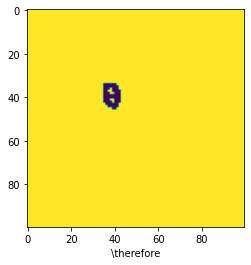

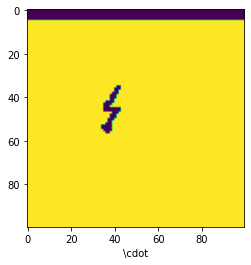

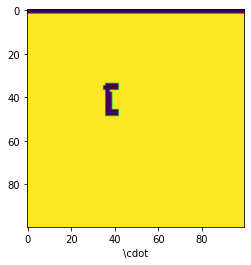

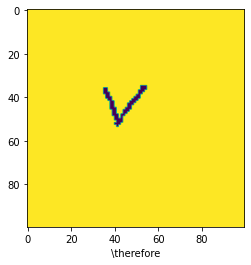

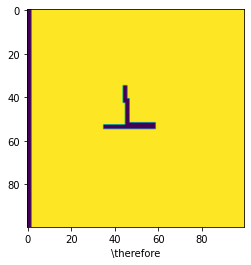

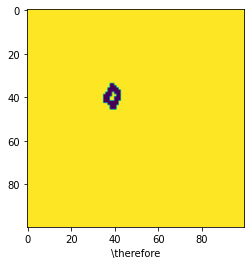

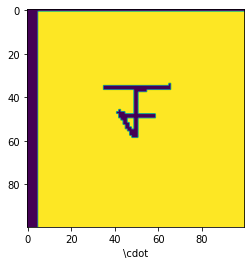

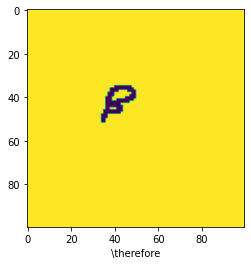

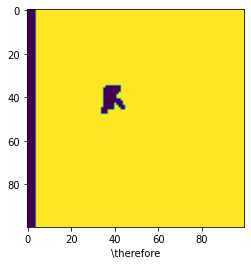

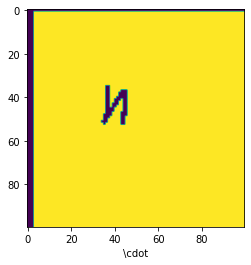

In [0]:
#Images and predictions
for x in range(30,40):
    #image = mpimg.imread(filename)
    #<something gets done here>
    im =test_images[x]
    im = np.reshape(im,(100,100))
    plt.figure()
    plt.imshow(im)
    label = alphabet[predictions[x]]
    plt.xlabel(label)
    print(alphabet[dftest[x][0]])
    print(predictions[x])